In [434]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,Aer,execute
from qiskit.visualization import plot_histogram
from math import pi

In [435]:
# This code is taken from IBMQ website.
# source : https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""

    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
    
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)

    return circuit

In [436]:
# This code is taken from IBMQ website.
# source : https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    
    return circuit.decompose() # .decompose() allows us to see the individual gates

In [437]:
def f_gate(qc,j,n):
    
    if j>1:
        qc.cx(j,int(n/2)+1)
        qc.cx(j,int(n/2)+j)
    elif j==1:
        qc.cx(j,int(n/2))

def inv_f_gate(qc,j,n):

    if j>1:
        qc.cx(j,int(n/2)+j)
        qc.cx(j,int(n/2)+1)
    elif j==1:
        qc.cx(j,int(n/2))

In [438]:
def q_gate(qc,y,j,n):
        
    bin_y = bin(y)[2:]      
    bin_y = list(reversed(bin_y))
     
    if bin_y[j]=='1':
        qc.rz(pi,j)  # Implementing R1 gate if yj is set 
    
    for i in list(reversed(range(j))):       #R2 to Rj gates if corresponding y bt is set
        if bin_y[i]=='1':
            qc.rz(pi/(2**(j-i)),int(n/2)-1+j-i)

In [439]:
def m_gate(qc,x,y,j,n):
    
    bin_x = bin(x)[2:]
        
    bin_x = list(reversed(bin_x))

    for i in range(j+1):
        if(bin_x[i]=='1'):     
            f_gate(qc,j-i,n)
            q_gate(qc,y,j-i,n)
            inv_f_gate(qc,j-i,n)

In [440]:
z = 5
y = 4       # multiplicand
x = 6       # multiplier

if x > y:
    x,y = y,x
    
n = len(bin(z)[2:])*2

# x,y,z has to have same length 

if len(bin(y)[2:]) != n//2 or len(bin(x)[2:]) != n//2:
    print("Please enter value which in same length of binary(z)")

In [441]:
q = QuantumRegister(n)
c = ClassicalRegister(n)

qc = QuantumCircuit(q,c)

# Initialize the binary value of z in first n/2 qubits 
for i in range(n//2):
    if bin(z)[2+i] == '1':
        qc.x(n//2-1-i)


In [442]:
qft(qc,int(n/2))

for i in range(int(n/2)):
    m_gate(qc,x,y,i,n)

inverse_qft(qc,int(n/2))

In [443]:
qc.measure(q[:n//2],c[:n//2])
# qc.draw()

In [444]:
back = Aer.get_backend('qasm_simulator')
job = execute(qc,back,shots=1048)
res = job.result()
cnt = res.get_counts()

Correct Answer: 29
29 % 3 = 2
29 % 6 = 5
29 % 12 = 5


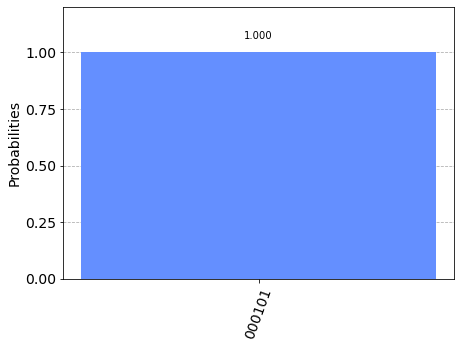

In [449]:
print("Correct Answer:",z + y*x)
print(z + y*x,"%",n//2,"=",(z+(y*x))%(n//2))
for i in range(n//2-1):
    print(z + y*x,"%",n*(i+1),"=",(z+(y*x))%(n*(i+1)))
    
plot_histogram(cnt)